# Trabalho 1 - Aprendizado de Máquina 1, 2021.2
## Driving Behavior
#### Integrantes do Grupo:
Bruno Leonel Nunes, RA: 770214 \
Júlia Almeida, RA: 772116 \
Yan Gimenez, RA: 769826 \



### Importando bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

from datetime import datetime
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

%matplotlib inline

### Reading the dataset

In [ ]:
from google.colab import files 

In [ ]:
uploaded = files.upload()

Saving driver_behavior.csv to driver_behavior.csv


In [ ]:
df = pd.read_csv('driver_behavior.csv')
df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [ ]:
df.drop(['Timestamp'], axis = 1, inplace = True)

In [ ]:
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AccX    6728 non-null   float64
 1   AccY    6728 non-null   float64
 2   AccZ    6728 non-null   float64
 3   GyroX   6728 non-null   float64
 4   GyroY   6728 non-null   float64
 5   GyroZ   6728 non-null   float64
 6   Class   6728 non-null   object 
dtypes: float64(6), object(1)
memory usage: 368.1+ KB


In [ ]:
aux = ['Class']
behavior = pd.get_dummies(df,columns=aux)

In [ ]:
behavior.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class_AGGRESSIVE,Class_NORMAL,Class_SLOW
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564,0.286415,0.326546,0.387039
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710,0.452119,0.468984,0.487109
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468,0.000000,0.000000,0.000000
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,0.000000,0.000000,0.000000
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,0.000000,0.000000,0.000000
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,1.000000,1.000000,1.000000
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500,1.000000,1.000000,1.000000


In [ ]:
behavior.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class_AGGRESSIVE,Class_NORMAL,Class_SLOW
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,1,0,0
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,1,0,0
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,1,0,0
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,1,0,0
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,1,0,0


In [ ]:
correlation = behavior.corr()

# Visualização dos dados

[Text(0, 0.5, 'Quantidade'), Text(0.5, 0, 'Grau de comportamento')]

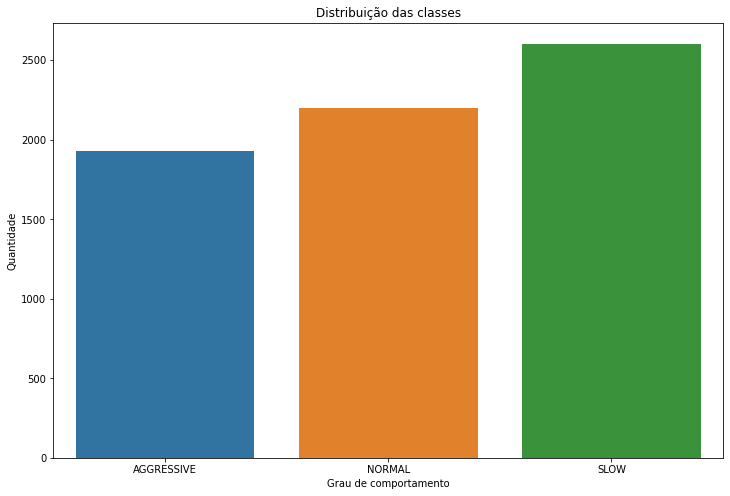

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Distribuição das classes")
fig = sns.countplot(x = 'Class', data = df)
fig.set(xlabel = "Grau de comportamento", ylabel = "Quantidade")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

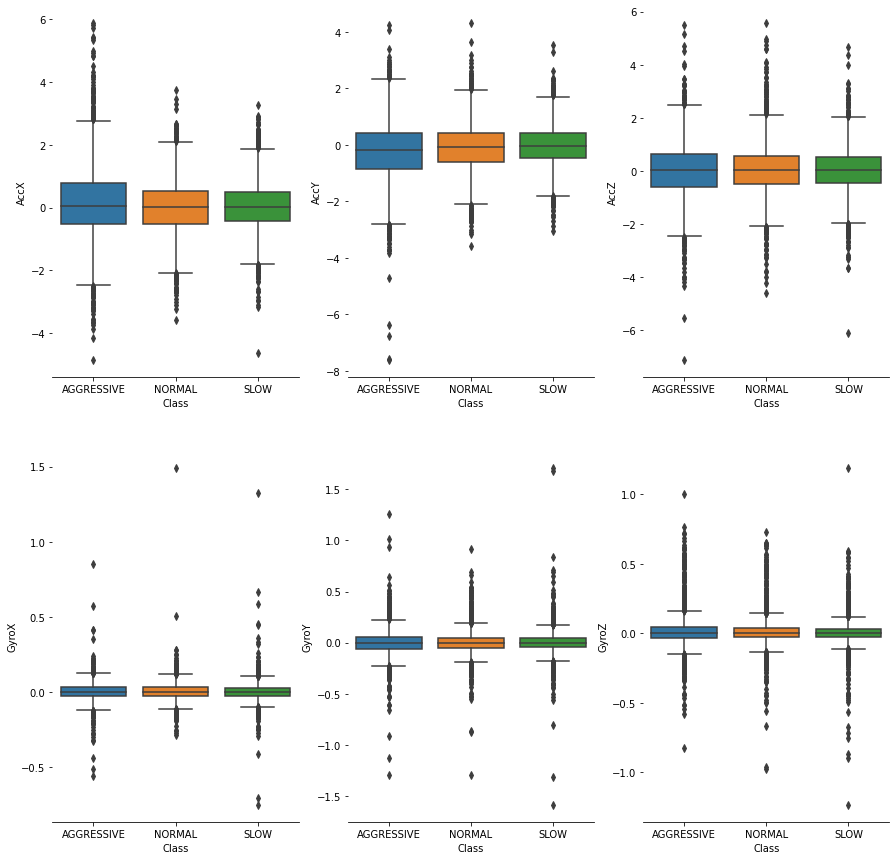

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(15, 15), sharex = False)
sns.despine(left=True)
sns.boxplot('Class', 'AccX', data = df, ax=axes[0, 0])
sns.boxplot('Class', 'AccY', data = df, ax=axes[0, 1])
sns.boxplot('Class', 'AccZ', data = df, ax=axes[0, 2])
sns.boxplot('Class', 'GyroX', data = df, ax=axes[1,0])
sns.boxplot('Class', 'GyroY', data = df, ax=axes[1,1])
sns.boxplot('Class', 'GyroZ', data = df, ax=axes[1,2])

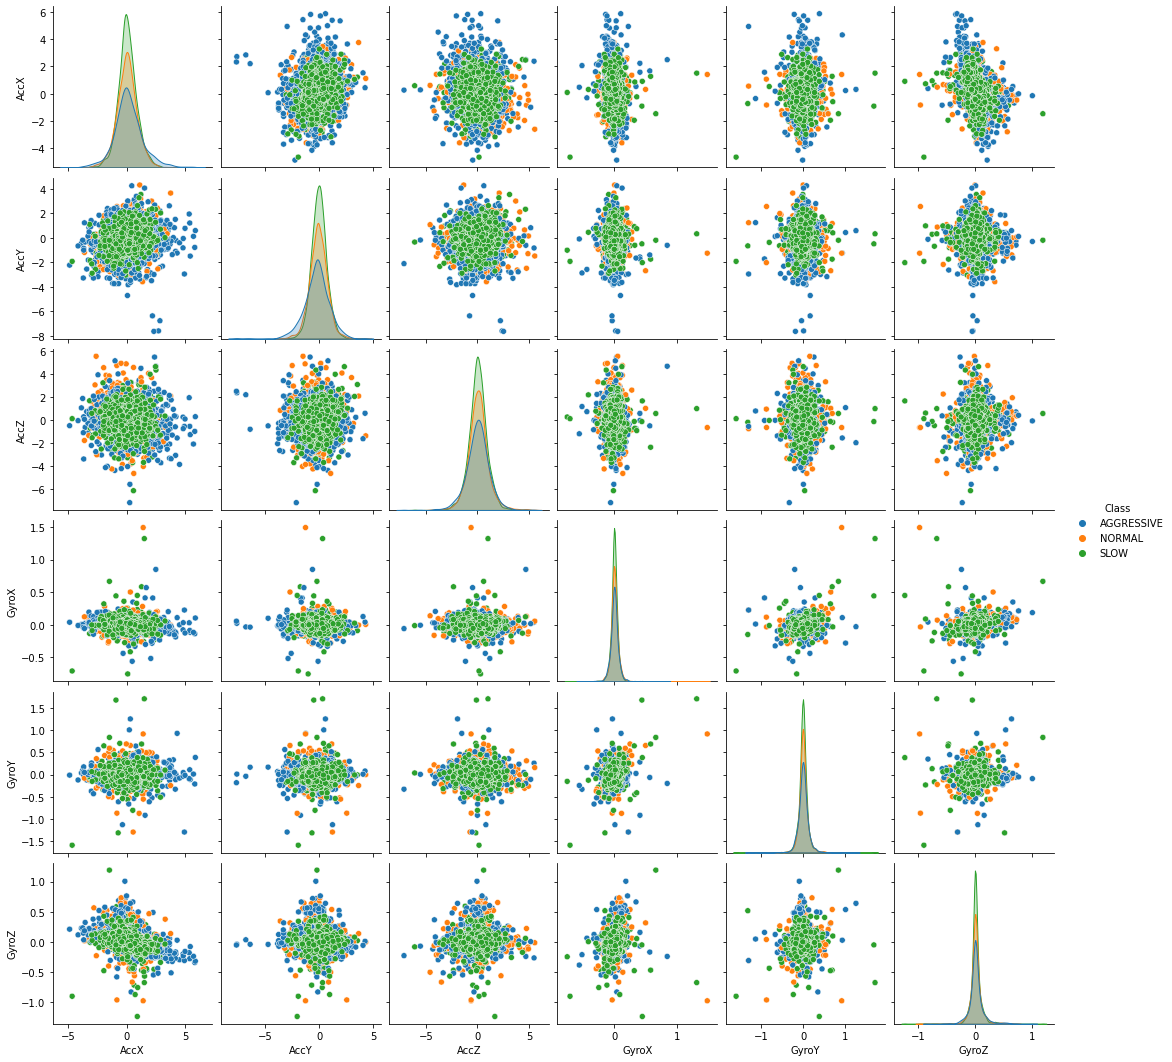

In [ ]:
sns.pairplot(df, hue='Class')

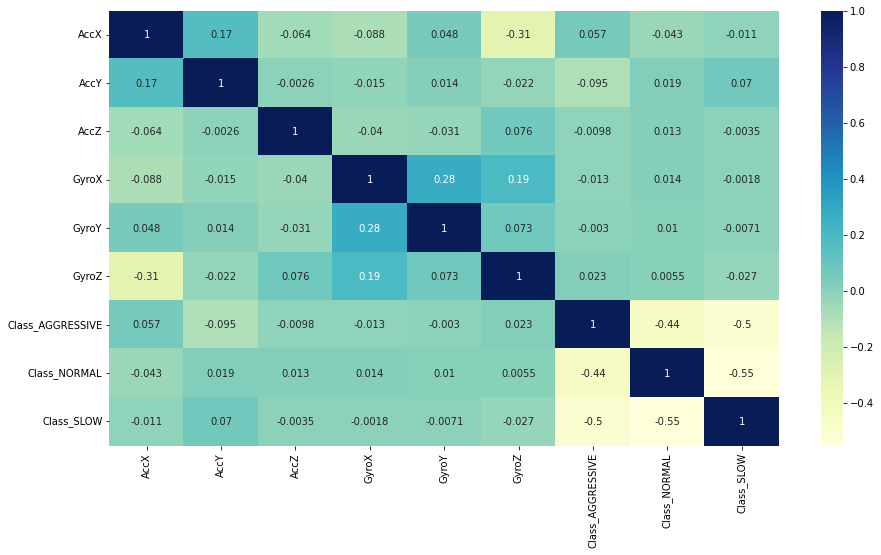

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')

In [ ]:
behavior.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class_AGGRESSIVE,Class_NORMAL,Class_SLOW
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,1,0,0
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,1,0,0
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,1,0,0
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,1,0,0
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,1,0,0


In [ ]:
sns.jointplot(x='AccX', y="Class_NORMAL", data=behavior, kind='kde')
sns.jointplot(x = 'AccX', y = "Class_SLOW", data = behavior, kind = 'kde')
sns.jointplot(x = 'AccX', y = "Class_AGGRESSIVE", data = behavior, kind = 'kde')


### Train Test Split

In [ ]:
y = behavior[['Class_AGGRESSIVE','Class_NORMAL', 'Class_SLOW']]
X = behavior.drop(['Class_AGGRESSIVE','Class_NORMAL', 'Class_SLOW'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
df['Class']=df['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 1, 1]) 

y = df['Class']
X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##Treinamento com Pipeline


In [ ]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', None)
])

skl_algs = []
skl_algs.append(LogisticRegression(random_state=0))
skl_algs.append(SVC(random_state=0,kernel="linear",C=1))
skl_algs.append(KNeighborsClassifier(n_neighbors=3))
skl_algs.append(DecisionTreeClassifier(random_state=0,max_depth=3)) 
skl_algs.append(RandomForestClassifier(random_state=0,max_depth=6)) 
skl_algs.append(GradientBoostingClassifier(random_state=0,max_depth=3, learning_rate= 1))

In [ ]:
all_scores = []

for alg in skl_algs:
    pipeline.set_params(clf = alg)
    scores = cross_validate(pipeline, X_train, y_train,cv=10,return_train_score=True)
        
    df = pd.DataFrame()
    df['score'] = scores['test_score']
    df.insert(0, 'score_name', 'test_score')
    
    tempDf = pd.DataFrame()
    tempDf['score'] = scores['train_score']
    tempDf.insert(0, 'score_name', 'train_score')
    
    df = pd.concat([df,tempDf])
    
    all_scores.append(df.reset_index())

Text(0.5, 1.0, 'GradientBoostingClassifier')

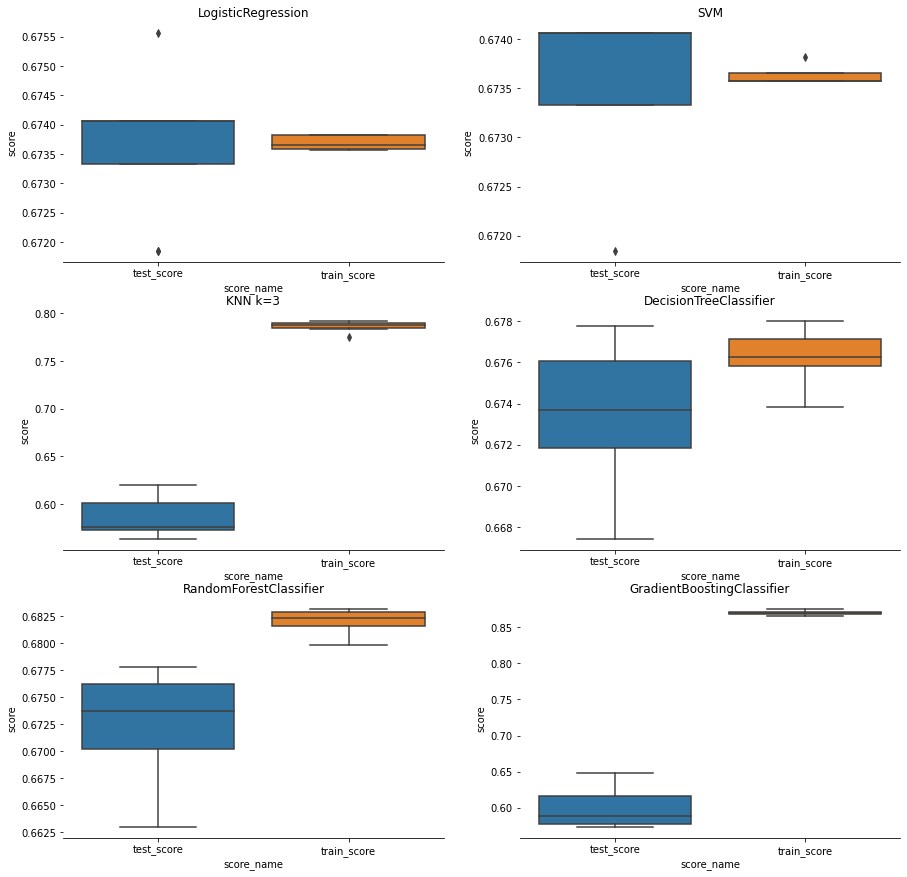

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot(y='score',x='score_name', data=all_scores[0],ax=axes[0, 0]).set_title("LogisticRegression")
sns.boxplot(y='score',x='score_name', data=all_scores[1],ax=axes[0, 1]).set_title("SVM")
sns.boxplot(y='score',x='score_name', data=all_scores[2],ax=axes[1, 0]).set_title("KNN k=3")
sns.boxplot(y='score',x='score_name', data=all_scores[3],ax=axes[1, 1]).set_title("DecisionTreeClassifier")
sns.boxplot(y='score',x='score_name', data=all_scores[4],ax=axes[-1,0]).set_title("RandomForestClassifier")
sns.boxplot(y='score',x='score_name', data=all_scores[5],ax=axes[-1,-1]).set_title("GradientBoostingClassifier")

###Optimizing DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=0,max_depth=3)
parameters = {'max_depth': [3, 4, 5, 6, 7],
              'criterion' : ['gini', 'entropy', 'log_loss']}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid = parameters, cv= kfold, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

,params,rank_test_score,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 3}",4,0.669178
1,"{'criterion': 'gini', 'max_depth': 4}",5,0.669176
2,"{'criterion': 'gini', 'max_depth': 5}",3,0.670065
3,"{'criterion': 'gini', 'max_depth': 6}",10,0.660299
4,"{'criterion': 'gini', 'max_depth': 7}",8,0.663631
5,"{'criterion': 'entropy', 'max_depth': 3}",1,0.673616
6,"{'criterion': 'entropy', 'max_depth': 4}",2,0.671396
7,"{'criterion': 'entropy', 'max_depth': 5}",6,0.668067
8,"{'criterion': 'entropy', 'max_depth': 6}",7,0.666069
9,"{'criterion': 'entropy', 'max_depth': 7}",9,0.660966


##Optimizing RandomForestClassifier


In [ ]:
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
max_depth = [2, 4, 6] 
parameters = {'max_depth' : max_depth,
               'max_features' : max_features,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}
               
model = RandomForestClassifier(max_depth = 6)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid = parameters, cv= kfold, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",20,0.673616
1,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",41,0.673394
2,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",41,0.673394
3,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",20,0.673616
4,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",20,0.673616
...,...,...,...
103,"{'bootstrap': False, 'max_depth': 6, 'max_feat...",101,0.672728
104,"{'bootstrap': False, 'max_depth': 6, 'max_feat...",56,0.673394
105,"{'bootstrap': False, 'max_depth': 6, 'max_feat...",88,0.672950
106,"{'bootstrap': False, 'max_depth': 6, 'max_feat...",72,0.673172


## Optimizing Logistic Regression Approach

In [ ]:
parameters = {'penalty': ['l1', 'l2'],
              'C' : [0.2, 0.5, 1]}               
model = LogisticRegression(random_state=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid = parameters, cv= kfold, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

,params,rank_test_score,mean_test_score
0,"{'C': 0.2, 'penalty': 'l1'}",4,NaN
1,"{'C': 0.2, 'penalty': 'l2'}",3,0.673616
2,"{'C': 0.5, 'penalty': 'l1'}",5,NaN
3,"{'C': 0.5, 'penalty': 'l2'}",1,0.673838
4,"{'C': 1, 'penalty': 'l1'}",6,NaN
5,"{'C': 1, 'penalty': 'l2'}",1,0.673838


# Acurácia dos modelos com os melhores parâmetros


####Declarando os modelos

In [ ]:
best_model_decision = DecisionTreeClassifier(criterion='entropy',max_depth=3)
best_model_random   = RandomForestClassifier(bootstrap = False, max_depth = 6, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
best_model_linear   = LogisticRegression(C = 1, penalty = 'l2')

####DecisionTreeClassifier

In [ ]:
best_model_decision_test = best_model_decision.fit(X_train, y_train)
y_best_test = best_model_decision_test.predict(X_test)
y_best_train = best_model_decision_test.predict(X_train)
print("Accuracy score test", accuracy_score(y_test, y_best_test))
print("Accuracy score train", accuracy_score(y_train, y_best_train))

Accuracy score test 0.6717694732102657
Accuracy score train 0.6740625693365875


####RandomForestClassifier

In [ ]:
best_model_random_test = best_model_random.fit(X_train, y_train)
y_best_test = best_model_random_test.predict(X_test)
y_best_train = best_model_random_test.predict(X_train)
print("Accuracy score test", accuracy_score(y_test, y_best_test))
print("Accuracy score train", accuracy_score(y_train, y_best_train))

Accuracy score test 0.6690679873930662
Accuracy score train 0.6842689150210783


####LogisticRegression

In [ ]:
best_model_linear_test = best_model_random.fit(X_train, y_train)
y_best_test = best_model_linear_test.predict(X_test)
y_best_train = best_model_linear_test.predict(X_train)
print("Accuracy score test", accuracy_score(y_test, y_best_test))
print("Accuracy score train", accuracy_score(y_train, y_best_train))

Accuracy score test 0.6690679873930662
Accuracy score train 0.6833814067006878
